<a href="https://colab.research.google.com/github/quimHM/ML_finalproject/blob/main/ML_finalproject_QUIMHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT CS401: 

#**PREDICTING UCI credit card approvals (and studying the BIAS in our data and model)**

**Quim De Las Heras Molins (21123349)**

**First Semester 2021/22**


This project consists in the study of a "credit approval" dataset, the training of a predictive model around it, and evaluation of its underlying biases, or lack thereof. Its aim is to showcase how different methods, models and tools that have been explained during this course can, indeed, be applied to data to learn actual insights from it, but also how this real-case uses can (and also have in the past) develop into palpable issues when deployed in the wild, due to their underlying biases going unchecked before their application in decision-based algorithms. It is structured in 5 main sections, namely:


1. Introduction and motivation
2. Inspection and pre-processing of the data
3. Learning of a predicting model around the data
4. Analysis of the model and rooting out of possible bias
5. Discussion of the findings, and shortcomings


Source of the dataset: 

https://archive.ics.uci.edu/ml/datasets/credit+approval

# 1. Introduction and motivation

Biases are an essential concept and building stone in Machine Learning and Aritifical Intelligence's constitution and training processes. "Bad" bias though, or undesired, human-made, unfair bias is something different and has itself the potential to turn all these new technologies being developed into agents every bit as damaging as they promise to be helpful and freeing.

Bias can be introduced to a given dataset or model or product in a multitude of ways and of a wide amount of types, most frequently involuntarily. Althought this is indeed a immense topic to embark on, simple and actual cases have been reported and can be found where these "bad" biases have had real effects and consequences on people's lives, specially since companies and institutions are starting to use more and more AI-fueled alogrithms as of late in order to guide law enforcement, employment and even housing decisions:

[Amazon scraps secret AI recruiting tool that showed bias against women](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G)

[Gender Shades: Intersectional Accuracy Disparities in
Commercial Gender Classification](http://gendershades.org/overview.html)

[Facial recognition scanners are already at some US airports](https://eu.usatoday.com/story/travel/airline-news/2019/08/16/biometric-airport-screening-facial-recognition-everything-you-need-know/1998749001/)

Since a personal interest in this field existed before the topic for this same project was to be chosen, an idea on how different tools that had been discussed could be combined and used on it sprung to mind as the academic term advanced, and the subjectivity and carelessness of humans when assessing their results or the usability of certain algorithms was even touched upon several times during the course as well (i.e. when disregarding the actual capabilities of perceptrons that only really focused on hairstyles or brightness levels), the previously ennounced project was chosen as a worthy and challenging enough endeavor on which to put in practice some of the concepts adquired in the form of a final outcome for the subject.




# 2. Inspection and pre-processing of the data

In [314]:
#IMPORTS AND NEEDED LIBRARIES
import pandas as pd
import numpy as np

#DATA PREPARATION
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#MODEL TRAINING AND TESTING
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#BIAS ANALISIS
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

**DRIVE** MOUNTING (IN ORDER TO SOURCE THE INPUT DATASET FROM THE CLOUD)

In [315]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING** OF THE DATASET (EDITABLE TO CHANGE INPUT SOURCE ACCORDINGLY)

In [316]:
# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML (maynooth)/FINAL PROJECT/credit.data', header=None)#TODO: COMMENT TO RUN LOCALY
#dataset = pd.read_csv('/credit.data', header=None) #TODO: UNCOMMENT FOR LOCAL EXECUTION, IF INPUT IN THE SAME DIRECTORY

# Inspect data and check correct reading of the input file
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# DATA **INSPECTION**

The dataset consists of 690 instances of 16 features (specifically we have float64, int64 and object data types).


Some features are numerical, spread across different apparent range widths, and some features have categorical values, and have been transformed into meaningless symbols to protect the confidentiality of the data. The features themselves also don't have indicative names about what they represent either. 

However, this [blog by Ryan Khuhn](https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html#exploratory-analysis-and-data-transformations) does offer us some insight on the probable labels that are being encoded, based on the informations that are frequently present in similarly-purposed datasets. These are, in order:

*Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income* and finally the *ApprovalStatus*

Due to the highly multidimensional nature of the dataset it is hard to visualize it or plot it in an immediately accessible way. We'll deal with this later, in order to better ascertain the connections between the different variables, their effect on each other, and the legitimacy of these influences. 

Lastly, whilst on first glance it would seem that no null or empty records exist in the dataframe, a closer inspection to some of the unique values of the non-numerical fetures quickly revealed that missing entries are being filled with '?' symbols across the whole structure, and therefore not detected as such.

In [317]:
# Print Dataframe information summary (690 samples, no nulls, 15 features and 1 binary output label, different ranges for each feature)
print(dataset.describe())
print(dataset.info())
somenonnumerical = [0,3,4,5,6]
for i in somenonnumerical: print(i,pd.unique(dataset[i]))

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-

# DATA **PRE-PROCESSING**

Before trying to ascertain a predictive model that can learn from and act like our dataset we have to deal with some issues regarding its structure and individual entries. This would be true even if we didn't plan to use any ML technique on it and we just wanted to find and report any useful statistical characteristics about it. 

1.   Deal with empty entries
2.   Transform categorical features
3.   Normalize unequal ranges
4.   Divide dataset between train and test sets (to confirm any insight acquired)

In [318]:
print("Original length:", len(dataset.values))
print("Amount of 'evident' null values:",dataset.isnull().values.sum(),"\n")

# '?' -> null
dataset = dataset.replace('?', np.nan) 
print("Unchanged length:",len(dataset.values))              
print("Updated, real, amount of null values:",dataset.isnull().values.sum(),"\n")

# 1. DESIGN DECISION: entries containing null values are droped. 
# (other ways to deal with null values, through data imputation: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)
dataset=dataset.dropna()
print("Usable length after dropping null values:",len(dataset.values))
print("Amount of null values in reduced dataset:",dataset.isnull().values.sum())

Original length: 690
Amount of 'evident' null values: 0 

Unchanged length: 690
Updated, real, amount of null values: 67 

Usable length after dropping null values: 653
Amount of null values in reduced dataset: 0


In [319]:
# Binary categorical target feature is "encoded" manually to ensure '+'=1, '-'=0
dataset[15].replace('+', 1.0, inplace=True)
dataset[15].replace('-', 0.0, inplace=True)

# 2. DESIGN DECISION: features containing categorical values are encoded using OrdinalEncoder()
# (other ways to deal with categorical features: https://pbpython.com/categorical-encoding.html)
oe = OrdinalEncoder() 

for col in dataset.columns:
    if dataset[col].dtype=='object':
        dataset[col] = oe.fit_transform(dataset[[col]])
dataset.head() # Check updated data types

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,153.0,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,68.0,0,1.0
1,0.0,321.0,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560,1.0
2,0.0,88.0,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,94.0,824,1.0
3,1.0,123.0,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3,1.0
4,1.0,42.0,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0,1.0


In [320]:
# Separate features (columns 0-14) and labels (column 15) of final, processed dataset, into X and y
X, y = dataset.iloc[:, 0: 15].values, dataset.iloc[:,15].values

# 3. Input X features are normalized, all scaled to the 0-1 range
sc = StandardScaler()
X = sc.fit_transform(X)

In [321]:
# 4. Scaled data is split into train and test sets (to check against overfitting, a 0.66-0.33 rate is chosen, could be 0.8-0.2 etc)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(437, 15) (216, 15) (437,) (216,)


# 3. Learning of a predicting model around the data
For this, a Logistic Regression model is chosen to predict the outcome of simmilarly generated data. 

It is a regression model that differentiates itself from the Linear Regression model introduced during the course in the fact that it is used to predict the most probable result of a categorical variable, that is, can only fall inside a limited range of possibilites. 

In this case it is a binary classification task ("Approved/Denied"), but this model can be extended to discern among a higher amount of probable classes as well, such as trying to determine which digit is being represented in a handrwitten image (i.e as in the MNIST dataset), which species of flower has a determined combination of telling attributes (i.e. as in the Iris dataset). Each label being assessed is given probability between 0 and 1, with a sum of one.

Default sklearn parameters proved to produce a 87% accurate classifier without further tampering of them being required, and additional combinations of the arguments regarding maximum amount of iterations before convergence, or tolerance in order to call it, didn't produce a more solid model. 

Furthermore, proceeding with this admitably simple configuration of a model, precisely with the purpose of following it up with further study to possibly identify any unwanted biases on it, would allow for an even clearer and obvious advert against trusting certain models without questioning their inner workings more exhaustively beforehand.


In [322]:
logreg = LogisticRegression() #default params (i.e tol=1e-4, max_iter=100,...)

MODEL **TRAINING**

In [323]:
# Train sets are used (66%)
logreg.fit(X_train, y_train)

LogisticRegression()

ESTIMATOR **EVALUATION**

In [324]:
# Test sets are used (33%)
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))
y_pred = logreg.predict(X_test) 
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8703703703703703
[[95 21]
 [ 7 93]]


# 4. Analysis of the model and rooting out of possible bias

The proposed method to evidence an existence of biases in the recently trained model, or lack thereof, is to visualize how it performs for the different "profiles" of costumers or data points archetypes, and check for the reasons behind their differences, if found.

These user types are extracted and synthesized from the dataset by making use of an unsupervised clustering techique also showcased during the course, K-means.

Then, faults in the model could be found in, at least, two instances:

*   Criteria of eligibility: 

For some clusters to be more frequently "approved" than others is absolutely to be expected. The problem, then, would reside in whether the reasons behind these differences are found not to be just financial in nature.

*   Dependability of these criteria:

If the model performed less reliably for some cluster than for others, that would mean that, when left to decide the fate of these credit applications, some customers would be judged more fairly and consistently than others, for whom it could behave more arbitrarily.



FIND AN **APPROPRIATE K** VALUE FOR CLUSTERING X

In [325]:
# Fitting multiple k-means algorithms and storing the values in an empty list
WSS = []
sil = []
kmeansLIST = []
for k in range(2,15):
    kmeansaux = KMeans(k, random_state = 123)
    kmeansaux.fit(X)

    WSS.append(kmeansaux.inertia_) #collect data for heuristic 1
    sil.append(silhouette_score(X, kmeansaux.labels_, metric = 'euclidean')) #collect data for heuristic 2
    kmeansLIST.append(kmeansaux) #save each k-clustering algorithm

# Converting the results into a dataframe in order to plot them
frame = pd.DataFrame({'Cluster':range(2,15), 'WSS':WSS, 'Silhouette':sil})

**ELBOW METHOD** HEURISTIC:

The Within-Cluster-Sum of Squared Errors (WSS, or Inertia) for different values of k is calculated, and the k value for which first it starts to diminish is chosen (in the plot of WSS/k, this k will appear as an "elbow"). However, in this instance, no such clear point exists for which successive k values the WSS becomes stable or keeps declining at a noticeable slower rate.

Text(0, 0.5, 'Inertia')

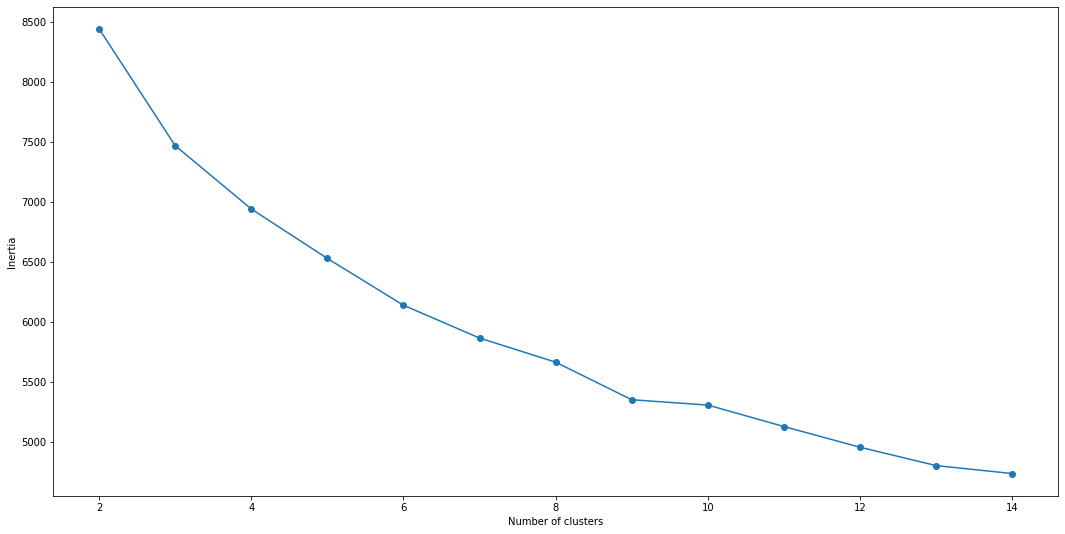

In [326]:
plt.figure(figsize=(18,9))
plt.plot(frame['Cluster'], frame['WSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

**SILHOUETTE METHOD** HEURISTIC:

Another way of determining the optimal number of clusters required to segment the observations in a sensible manner is to make use of the Silhouette Method heuristic. It consists in measuring how similar a point is to its own cluster compared against all other clusters, and a global maximum for all points, for a certain k, is to be desired.

Text(0, 0.5, 'Silhouette Score')

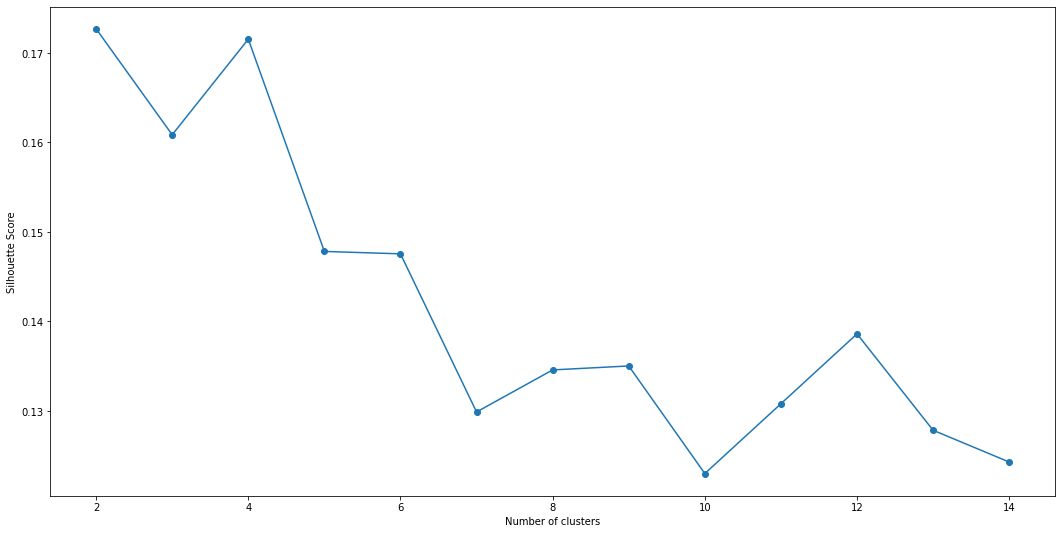

In [327]:
plt.figure(figsize=(18,9))
plt.plot(frame['Cluster'], frame['Silhouette'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

ACTUAL **CLUSTERING OF THE DATASET**

In [328]:
# Profiling all clients as one in k=4 groups, for such real-bank-sourced data seems unplausibly reductionist
k=6 # 6 is the selected number of clusters, even as it is a simmilarly uncomfortable k value to settle for
kmeansAlg = kmeansLIST[k-2]

In [329]:
def provideKlusteredX(kmeans,Xtok, Ytok, c):
  labels = kmeans.predict(Xtok)
  nk = kmeans.n_clusters
  labelslist = labels.tolist()
  print(len(labelslist))
  occurences=[0]*nk
  clustered_X=[]
  clustered_Y=[]

  for i in range(nk):
    clustered_X.append([])
    clustered_Y.append([])

  for i in range(len(labelslist)):
    clustered_X[labelslist[i]].append(Xtok[i])
    clustered_Y[labelslist[i]].append(Ytok[i])

  for i in range(nk):
    occurences[i]=labelslist.count(i)
  colorlist = ["tab:purple","tab:blue","tab:cyan"]
  plt.bar(range(nk),occurences,color=colorlist[c])
  plt.xlabel("k clusters")
  plt.ylabel("n Applications belonging in each cluster")
  #print(occurences)
  return clustered_X,clustered_Y

653


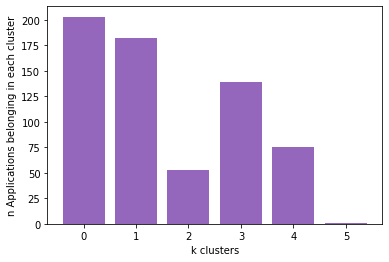

In [330]:
clustered_totalX,clustered_totalY = provideKlusteredX(kmeansAlg, X, y, 0) # The total X data is clustered and visualized in 6 groups

437


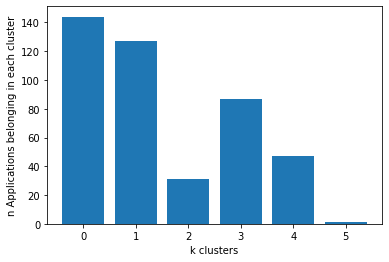

In [331]:
clustered_trainX,clustered_trainY = provideKlusteredX(kmeansAlg, X_train, y_train, 1) # X_train data is clustered to confirm it was a representative sample of X

216


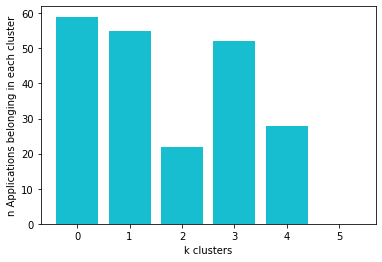

In [332]:
clustered_testX,clustered_testY = provideKlusteredX(kmeansAlg, X_test, y_test, 2) # X_test data is clustered to confirm it is a representative sample of X

COMPUTED CLUSTER CENTERS vs COMPUTED RELEVANT FACTORS

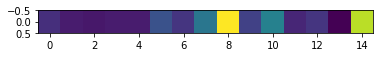

     0     1     2     3     4     5   ...    9     10    11    12   13    14
0 -0.01 -0.14 -0.16 -0.14 -0.14  0.24  ...  0.11  0.64 -0.07  0.03 -0.3  1.61

[1 rows x 15 columns]


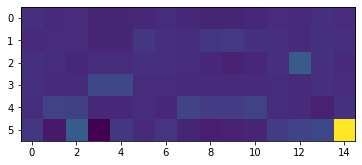

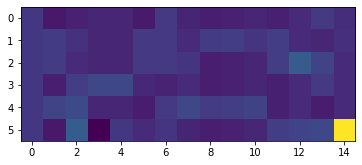

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.671648,-1.359758,-0.920630,-0.536873,-0.554357,-1.344843,0.768656,-0.654378,-1.071460,-0.885524,-0.504019,-0.927577,-0.301777,0.855789,-0.050247
1,0.671648,0.867701,0.233011,-0.536873,-0.554357,0.751614,0.768656,-0.283297,0.933306,1.129275,0.503093,1.078078,-0.301777,-0.509723,0.015857
2,0.671648,0.999373,-0.306483,-0.536873,-0.554357,0.751614,0.768656,0.372774,-1.071460,-0.885524,-0.504019,1.078078,3.347492,1.572122,-0.193125
3,0.671648,-1.019605,1.046233,1.800314,1.811624,-0.413084,-0.836244,-0.295171,-1.071460,-0.885524,-0.504019,-0.927577,-0.301777,0.743861,-0.193125
4,0.671648,1.624817,2.024688,-0.536873,-0.554357,-1.111903,0.768656,1.857098,0.933306,1.129275,1.308783,-0.927577,-0.301777,-1.248442,-0.193125
5,0.671648,-1.403649,3.418215,-2.874059,0.628634,-0.180145,0.367431,-0.666252,-1.071460,-0.885524,-0.504019,1.078078,1.522857,1.818362,18.857199


In [333]:
# Show coefficents of the trained model
plt.imshow(logreg.coef_, interpolation='nearest')
plt.show()
print(pd.DataFrame(logreg.coef_).round(2))

# Show cluster centers (NOT NECESSARILY REAL DATA POINTS)
kcenters = kmeansAlg.cluster_centers_ 
plt.imshow(kcenters, interpolation='nearest')
plt.show()

# Show actual, real data points closest to each center
realclosest = [None]*k
for c in range(k):
  mind = np.sqrt(np.sum(np.square(clustered_totalX[c][0] - kcenters[c])))
  realclosest[c] = clustered_totalX[c][0]
  for p in clustered_totalX[c]:
    if (np.sqrt(np.sum(np.square(p - kcenters[c]))) < mind):
      realclosest[c] = p
plt.imshow(realclosest, interpolation='nearest')
plt.show()

display(pd.DataFrame(realclosest))

**STATS** ON CLUSTERED **PRESENCE RATE AND CREDIT APPROVALS**

In [334]:
def StatsOnKlustered(totalX,clusteredX, clusteredY):
  TOTALyes = 0
  for i in range(len(clusteredY)):
    TOTALyes += clusteredY[i].count(1.0)
  TOTALno = len(totalX)-TOTALyes
  presencerate = [] # Instances of this type divided by total instances (in totalX)
  approvalrate = [] # Approval rate for this type
  approvalcontributionrate = [] # Approval for this type divided by the total n of approvals (in totalX)
  for i in range(len(clusteredY)):
    yes = clusteredY[i].count(1.0)
    no = clusteredY[i].count(0.0)
    instances = len(clusteredY[i])

    #print("Approved:",yes,"// Denied: ",no)
    presencerate.append(100*instances/len(totalX))
    approvalrate.append(100*yes/max(1,instances))
    approvalcontributionrate.append(100*yes/TOTALyes)
    
    print("Instance proportion:",presencerate[i],"// Approval rate:",approvalrate[i],"// Approval contribution:",approvalcontributionrate[i])
    print()
  return presencerate,approvalrate,approvalcontributionrate

In [335]:
presencerateTOTAL,approvalrateTOTAL,approvalcontributionrateTOTAL = StatsOnKlustered(X,clustered_totalX,clustered_totalY) # we check again that approval stats for X are similar than for Xtest

Instance proportion: 31.08728943338438 // Approval rate: 16.748768472906406 // Approval contribution: 11.486486486486486

Instance proportion: 27.871362940275652 // Approval rate: 75.27472527472527 // Approval contribution: 46.28378378378378

Instance proportion: 8.116385911179172 // Approval rate: 28.30188679245283 // Approval contribution: 5.0675675675675675

Instance proportion: 21.28637059724349 // Approval rate: 28.776978417266186 // Approval contribution: 13.513513513513514

Instance proportion: 11.485451761102603 // Approval rate: 92.0 // Approval contribution: 23.31081081081081

Instance proportion: 0.15313935681470137 // Approval rate: 100.0 // Approval contribution: 0.33783783783783783



In [336]:
presencerateTEST,approvalrateTEST,approvalcontributionrateTEST = StatsOnKlustered(X_test,clustered_testX,clustered_testY) # indeed, different clusters have unequal weights in the whole of applications and approvals

Instance proportion: 27.314814814814813 // Approval rate: 20.338983050847457 // Approval contribution: 12.0

Instance proportion: 25.462962962962962 // Approval rate: 76.36363636363636 // Approval contribution: 42.0

Instance proportion: 10.185185185185185 // Approval rate: 22.727272727272727 // Approval contribution: 5.0

Instance proportion: 24.074074074074073 // Approval rate: 26.923076923076923 // Approval contribution: 14.0

Instance proportion: 12.962962962962964 // Approval rate: 96.42857142857143 // Approval contribution: 27.0

Instance proportion: 0.0 // Approval rate: 0.0 // Approval contribution: 0.0



**STATS** ON CLUSTERED **PREDICTED LABELS AND MODEL ACCURACY**

In [337]:
def StatsOnKlusteredLogRegResults(logregAlg, totalX, clusteredX, clusteredY):
  y_pred = logregAlg.predict(totalX)
  TOTALyes = np.count_nonzero(y_pred == 1)
  TOTALno = np.count_nonzero(y_pred == 0)
  #NOW ALSO COMPUTE ACCURACY OF THE MODEL FOR DIFFERENT CLUSTERS AND **PREDICTED** APPROVAL RATES
  presencerate = [] # Predicted instances of this type divided by total instances (in totalX)
  approvalrate = [] # Predicted approval rate for this type
  approvalcontributionrate = [] # Predicted approval for this type over the total n of predicted approvals (in totalX)
  accuracy = [] # logreg model accuracy per kluster
  for i in range(len(clusteredX)):
    if (len(clusteredX[i])>0):
      y_pred = logregAlg.predict(clusteredX[i])
      print("Accuracy of logistic regression classifier: ", logregAlg.score(clusteredX[i], clusteredY[i]))
      accuracy.append(100*logregAlg.score(clusteredX[i], clusteredY[i]))
    else:
      y_pred = []
      accuracy.append(0)

    yes = np.count_nonzero(y_pred == 1)
    no = np.count_nonzero(y_pred == 0)
    instances = len(clusteredY[i])

    presencerate.append(100*instances/len(totalX))
    approvalrate.append(100*yes/ max(1,instances))
    approvalcontributionrate.append(100*yes/TOTALyes)

    print("Instance proportion:",presencerate[i],"// Approval rate:",approvalrate[i],"// Approval contribution:",approvalcontributionrate[i])
    print()
  return presencerate,approvalrate,approvalcontributionrate, accuracy

In [338]:
presencerateTESTpred,approvalrateTESTpred,approvalcontributionrateTESTpred, accuracyperK = StatsOnKlusteredLogRegResults(logreg,X_test,clustered_testX,clustered_testY) # Here the logreg model is used

Accuracy of logistic regression classifier:  0.864406779661017
Instance proportion: 27.314814814814813 // Approval rate: 27.11864406779661 // Approval contribution: 14.035087719298245

Accuracy of logistic regression classifier:  0.9454545454545454
Instance proportion: 25.462962962962962 // Approval rate: 81.81818181818181 // Approval contribution: 39.473684210526315

Accuracy of logistic regression classifier:  0.6818181818181818
Instance proportion: 10.185185185185185 // Approval rate: 27.272727272727273 // Approval contribution: 5.2631578947368425

Accuracy of logistic regression classifier:  0.8269230769230769
Instance proportion: 24.074074074074073 // Approval rate: 36.53846153846154 // Approval contribution: 16.666666666666668

Accuracy of logistic regression classifier:  0.9642857142857143
Instance proportion: 12.962962962962964 // Approval rate: 100.0 // Approval contribution: 24.56140350877193

Instance proportion: 0.0 // Approval rate: 0.0 // Approval contribution: 0.0



# INSIGHT VISUALIZATION FOR **TRUE TEST DATA**

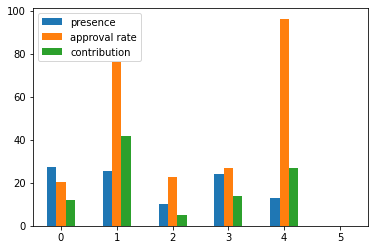

In [339]:
df = pd.DataFrame({'presence': presencerateTEST,
                   'approval rate': approvalrateTEST,
                   'contribution': approvalcontributionrateTEST}, index=range(k))
ax = df.plot.bar(rot=0)

# INSIGHT VISUALIZATION FOR **PREDICTED Y**

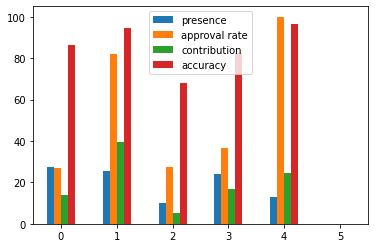

In [340]:
df = pd.DataFrame({'presence': presencerateTESTpred,
                   'approval rate': approvalrateTESTpred,
                   'contribution': approvalcontributionrateTESTpred,
                   'accuracy': accuracyperK}, index=range(k))
ax = df.plot.bar(rot=0)

#5. Discussion of the findings, and shortcomings

From the clustering of the data in 6 segments, it can be stated that the partition of the input between train/test sets it's been done mostly correctly since the same clustering algorithm, learned from the main body of data, simmilarly partitions the two sets and finds an approximately proportional amount of instances of each class in both of them.

In that sense, though, it is notable that no credit applications belonging to the fifth cluster class are found in the test set, as they all fell inside the training one. This can be attributed to the fact that it is a very minoritary fraction of the dataset (0.15% of the total).

Such outlier behaviour could have been pruned from the data in the earlier pre-processing steps, and dealt with separaretly, or disregarded altogether. In an analogous manner, another additional step that could have been rellevant to perform during this preliminar data preparation stage, could have been to undergo some feature-selection process and to consider eliminating some of the less determinant variables from the data in order to reduce the multidimensionality of the problem to some extent, and simplify all future procedures.

Nevertheless, when analysing the actual support that's been worked on, and the stats regarding approval and accuracy rates showcased, two things seem important to point out. First, we can indeed confirm that for different "profiles" of clients the model seems to perform less consistently than for others, with some clusters being predicted with 98% accuracy and some other with 68% (which, in a binary classification problem, is not very remarkable), when the overall efficiency is supposed to be 87%. This, then, doesn't tell us about bias being present in the database directly, but in the model we trained.

Secondly, the fact that for some clusters the approval rate isn't neither clearly approaching 0 nor 1 signifies that the current clustering being done is not good enough to categorize the different types of applications into truly homogenous groups that can be dealt with uniformly. That, or that perhaps "mostly" homogenous groups are being found and formed, except for some difference in one or two of the features that turn to make all the difference at the end. 

To more closely scrutinize this effect, the cluster number 3, for which a 27% true approval rate (37% predicted) was computed, was then clustered itself into 5 additional clusters to try and see more clearly defined factions inside it with more extreme approval/denied rates. Indeed, inspecting those clusters showcases how parameters 8 and 14, that is, "PriorDefault" (missed payments history) and "Income", are what sets apart the more accepted subclusters from the least approved ones. This can be seen in the visualizations bellow, and it's coherent with the regression's coefficents displayed above.

52
Accuracy of logistic regression classifier:  0.8333333333333334
Instance proportion: 11.538461538461538 // Approval rate: 16.666666666666668 // Approval contribution: 5.2631578947368425

Accuracy of logistic regression classifier:  0.9130434782608695
Instance proportion: 44.23076923076923 // Approval rate: 8.695652173913043 // Approval contribution: 10.526315789473685

Accuracy of logistic regression classifier:  0.5
Instance proportion: 15.384615384615385 // Approval rate: 100.0 // Approval contribution: 42.10526315789474

Accuracy of logistic regression classifier:  0.875
Instance proportion: 15.384615384615385 // Approval rate: 25.0 // Approval contribution: 10.526315789473685

Accuracy of logistic regression classifier:  0.8571428571428571
Instance proportion: 13.461538461538462 // Approval rate: 85.71428571428571 // Approval contribution: 31.57894736842105



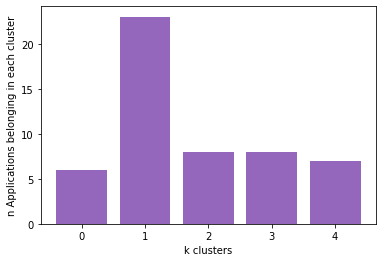

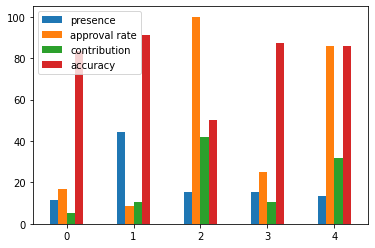

In [341]:
kmeans_on_three = KMeans(5, random_state=123)
kmeans_on_three.fit(clustered_testX[3])
clustered_3X,clustered_3Y = provideKlusteredX(kmeans_on_three, clustered_testX[3], clustered_testY[3], 0)
presencerate3pred,approvalrate3pred,approvalcontributionrate3pred, accuracyperK3 = StatsOnKlusteredLogRegResults(logreg,clustered_testX[3],clustered_3X,clustered_3Y) # Here the logreg model is used
df = pd.DataFrame({'presence': presencerate3pred,
                   'approval rate': approvalrate3pred,
                   'contribution': approvalcontributionrate3pred,
                   'accuracy': accuracyperK3}, index=range(5))
ax = df.plot.bar(rot=0)

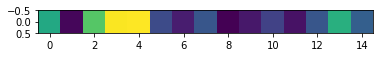

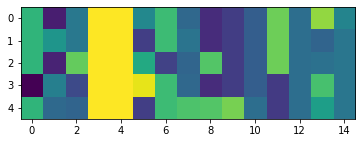

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.671648,-1.217113,-0.165139,1.800314,1.811624,0.052795,0.768656,-0.369387,-1.071460,-0.885524,-0.504019,1.078078,-0.301777,1.281112,-0.002622
1,0.671648,0.231284,-0.165139,1.800314,1.811624,-0.878964,0.768656,-0.220955,-1.071460,-0.885524,-0.504019,1.078078,-0.301777,-0.420181,-0.193125
2,0.671648,-1.162250,1.029312,1.800314,1.811624,0.518674,-0.836244,-0.418370,0.933306,-0.885524,-0.504019,1.078078,-0.301777,-0.263483,-0.193125
3,-1.488875,-0.064979,-0.745444,1.800314,1.811624,1.683372,0.768656,-0.369387,-1.071460,-0.885524,-0.504019,-0.927577,-0.301777,0.855789,-0.190648
4,0.671648,-0.361242,-0.421946,1.800314,1.811624,-0.878964,0.768656,0.892288,0.933306,1.129275,-0.302596,-0.927577,-0.301777,0.363309,-0.193125


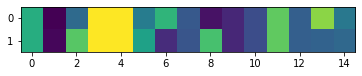

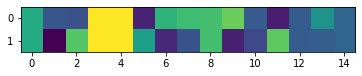

In [342]:
realclosest3 = [None]*5
for c in range(5):
  mind = np.sqrt(np.sum(np.square(clustered_3X[c][0] - kcenters[c])))
  realclosest3[c] = clustered_3X[c][0]
  for p in clustered_3X[c]:
    if (np.sqrt(np.sum(np.square(p - kcenters[c]))) < mind):
      realclosest3[c] = p

plt.imshow([realclosest[3]], interpolation='nearest') # Chosen "representative" real data point center of whole cluster 3
plt.show()

plt.imshow(realclosest3, interpolation='nearest')
plt.show()

display(pd.DataFrame(realclosest3))

plt.imshow([realclosest3[0],realclosest3[2]], interpolation='nearest') # 17% vs 86% subclusters
plt.show()

plt.imshow([realclosest3[4],realclosest3[2]], interpolation='nearest')  # 86% vs 100% subclusters
plt.show()

Moving forward, about bias in the dataset, it can be stated that by looking at its covariance matrix for any other proxy variables or undirect indicators that could be inadvertedly deeply related to this "PriorDefault" and "Income" parameters, no strong evidence of such relations is found.

Even if they were detected, possible flaws in that regard could still point again to errors in the treatment of the data towards building the model (possible poor encoding technique choice, lack of feature-selection process, inadequate combination of scaling and econding, etc) and not necessarily to biased source data (prejudice-based decision-making by the real bank).

Being on alert for bias in both the datasets as well as the models learned from them is equally rellevant, and responsability for it can fall on any or multiple of the steps of the whole process from the collection of the data, to the final deployment of any given product, and its study must continue even after and during that, to reduce possible faults being encountered after-the-fact.

Although no definite answers have been reached by using the proposed tools and methods so far, some interesting questions and caveats in their application and meaning are considered to have been raised and exposed in the course of this project.

In addition to all previously mentioned changes and updates that could be explored in order to continue and improve the results of this thread of work, trying an altogheter different set of methods could also be equally enriching: different supervised predictive methods could be better adapted to the data (or sigmoid-based NN), and alternative unsupervised clustering methods be more suited for sets with such strong categorical component to their values' definition.

In [343]:
pd.DataFrame(X).cov().

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.001534,0.065744,-0.034959,0.066844,0.063219,-0.011585,0.057300,0.085029,-0.023287,-0.065292,-0.016709,0.052395,0.082074,0.109366,0.013119
1,0.065744,1.001534,0.160642,-0.086741,-0.102732,0.041003,-0.200583,0.410336,0.223022,0.086072,0.191960,0.072118,-0.015586,-0.029578,0.030496
2,-0.034959,0.160642,1.001534,-0.102400,-0.089882,0.009235,-0.030713,0.301061,0.237114,0.166347,0.270248,-0.006093,-0.105342,-0.266957,0.119937
3,0.066844,-0.086741,-0.102400,1.001534,0.982585,-0.045093,-0.021047,-0.089787,-0.116192,-0.158360,-0.104221,-0.009865,-0.037992,-0.001087,-0.118687
4,0.063219,-0.102732,-0.089882,0.982585,1.001534,-0.051413,-0.026042,-0.081988,-0.129288,-0.169952,-0.110992,0.001750,-0.011950,0.013943,-0.018557
5,-0.011585,0.041003,0.009235,-0.045093,-0.051413,1.001534,-0.000937,0.032754,0.105359,0.112327,-0.002710,0.069827,0.017261,0.108096,-0.006710
6,0.057300,-0.200583,-0.030713,-0.021047,-0.026042,-0.000937,1.001534,-0.095123,-0.035031,-0.001454,-0.037387,-0.004241,0.042559,-0.019635,-0.022562
7,0.085029,0.410336,0.301061,-0.089787,-0.081988,0.032754,-0.095123,1.001534,0.336663,0.228385,0.327827,0.139531,-0.001765,-0.093331,0.052239
8,-0.023287,0.223022,0.237114,-0.116192,-0.129288,0.105359,-0.035031,0.336663,1.001534,0.431247,0.378845,0.090002,-0.110644,-0.064896,0.084557
9,-0.065292,0.086072,0.166347,-0.158360,-0.169952,0.112327,-0.001454,0.228385,0.431247,1.001534,0.570049,0.020254,-0.233810,-0.071048,0.068294
